## test sampling 

-> adjusting angles

In [1]:
import os, glob
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage.interpolation import rotate

In [2]:
ct = np.load('C://Users//Heeguen//Desktop//heeguen//Dental_panorama_2020//np_data/ct.npy', allow_pickle=True)
sample = ct[0] # sample 1개 추출

In [3]:
tmp = np.transpose(sample, (2,0,1))
tmp.shape

(424, 671, 671)

In [4]:
tmp_ = tmp + 1000

# tmp_ = np.zeros((tmp.shape))
# tmp_1000 = tmp + 1000

# for s in range(tmp_1000.shape[0]):
#     for w in range(tmp_1000.shape[1]):
#         for h in range(tmp_1000.shape[2]):
#             tmp_[s,w,h] = tmp_1000[s,w,h]
#             if tmp_1000[s,w,h] > 3000:
#                 tmp_[s,w,h] = 3000
#             else:
#                 tmp_[s,w,h] = tmp_1000[s,w,h]

In [5]:
print(tmp_.min())
print(tmp_.max())

0.0
23595.0


In [6]:
tot1 = []

# angles = np.arange(-50, 220, 5) # 54 angles -5~220 (step = 5)
angles = np.arange(-50, 240, 3)
for angle in angles:
    print(angle)
    tmp_rot = rotate(tmp_, angle, axes=(1,2), reshape=False) # rotate 3d 
    
    min_ = 320
    max_ = 325

    test = np.zeros((tmp_rot.shape[0], tmp_rot.shape[1], (max_ - min_))) # 200 300
    for s in range(tmp_rot.shape[0]): # slice range 도 0~200 으로 제한하고 해보자 
        for w in range(tmp_rot.shape[1]): # range 를 0~ 300 으로 제한해보자.
            for h in range(min_,max_):
                test[s,w,h-min_] = tmp_rot[s,w,h]*(1-(w/tmp_rot.shape[1])) # 잘라올때 interpolation 추가.. detector에 가까 울수록 더 값이 커지도록 (1-(w/tmp.shape[1])) 곱해줌.
                
    tot1.append(test)    
    tot_1 = tot1[0]
    for i in range(len(tot1)-1):  # range(13)
        tot_1 = np.concatenate((tot_1, tot1[i+1]),axis=2) 

-50
-47
-44
-41
-38
-35
-32
-29
-26
-23
-20
-17
-14
-11
-8
-5
-2
1
4
7
10
13
16
19
22
25
28
31
34
37
40
43
46
49
52
55
58
61
64
67
70
73
76
79
82
85
88
91
94
97
100
103
106
109
112
115
118
121
124
127
130
133
136
139
142
145
148
151
154
157
160
163
166
169
172
175
178
181
184
187
190
193
196
199
202
205
208
211
214
217
220
223
226
229
232
235
238


In [10]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def show(x):
    idx = x
    plt.figure(figsize=(18,9))
    plt.subplot(121)
    plt.imshow(np.rot90(tmp_[idx, ...]), cmap='gray')
    
    plt.subplot(122) 
    plt.imshow(tot_1[idx, ...], cmap='gray')
    
#     plt.subplot(122) 
#     plt.imshow(test[:, idx, :], cmap='gray')

In [11]:
interact(show, x=widgets.IntSlider(min=0, max=(tot_1.shape[0]-1), step=1,value=tot_1.shape[0]//2))

interactive(children=(IntSlider(value=212, description='x', max=423), Output()), _dom_classes=('widget-interac…

<function __main__.show(x)>

In [49]:
tot_1.shape

(424, 671, 485)

In [50]:
tot_t = np.transpose(tot_1[:200], (1,0,2))

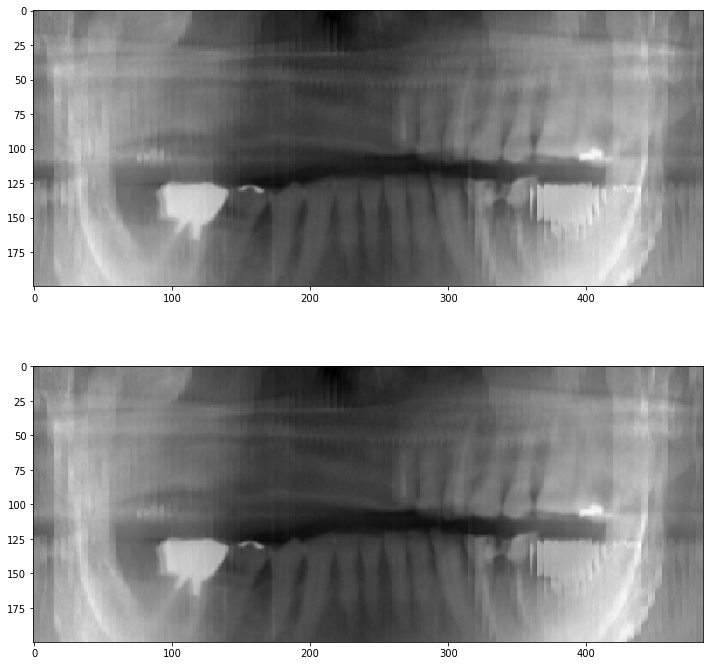

In [55]:
tot_f1 = np.zeros((200, 485))
tot_f2 = np.zeros((200, 485))

for s in range(tot_t.shape[0]):
    tot_f1 += tot_t[s, ...]
    tot_f2 += tot_t[s, ...]*(1-((1/(2*tot_t.shape[0])*s)))
    
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(np.flipud(tot_f1), cmap='gray')

plt.subplot(212)
plt.imshow(np.flipud(tot_f2), cmap='gray')

pixel 1angle = 

In [56]:
import math

In [77]:
math.atan(1/335) * math.pi/180

5.2099225910569233e-05

In [81]:
tot2 = []

# angles = np.arange(-50, 220, 5) # 54 angles -5~220 (step = 5)
# angles = np.arange(-50, 240, 1)
angles = np.arange(-50, 240, 1)
for angle in angles:
    if angle == 239 :
        print(angle)
    tmp_rot = rotate(tmp_[:200, ...], angle, axes=(1,2), reshape=False) # rotate 3d 
    
    min_ = 324
    max_ = 325

    test = np.zeros((200, tmp_rot.shape[1], (max_ - min_))) # 200 300
    for s in range(200): # slice range 도 0~200 으로 제한하고 해보자 
        for w in range(tmp_rot.shape[1]): # range 를 0~ 300 으로 제한해보자.
            for h in range(min_,max_):
                test[s,w,h-min_] = tmp_rot[s,w,h]*(1-(w/tmp_rot.shape[1])) # 잘라올때 interpolation 추가.. detector에 가까 울수록 더 값이 커지도록 (1-(w/tmp.shape[1])) 곱해줌.
                
    tot2.append(test)    
    tot_2 = tot2[0]
    for i in range(len(tot2)-1):  # range(13)
        tot_2 = np.concatenate((tot_2, tot2[i+1]),axis=2) 

239


In [82]:
def show45(x):
    idx = x
    plt.figure(figsize=(18,9))
    plt.subplot(121)
    plt.imshow(np.rot90(tmp_[idx, ...]), cmap='gray')
    
    plt.subplot(122)
    plt.imshow(tot_2[idx, ...], cmap='gray')
    
interact(show45, x=widgets.IntSlider(min=0, max=(tot_2.shape[0]-1), step=1,value=tot_2.shape[0]//2))

interactive(children=(IntSlider(value=100, description='x', max=199), Output()), _dom_classes=('widget-interac…

<function __main__.show45(x)>

In [83]:
tot_2.shape

(200, 671, 290)

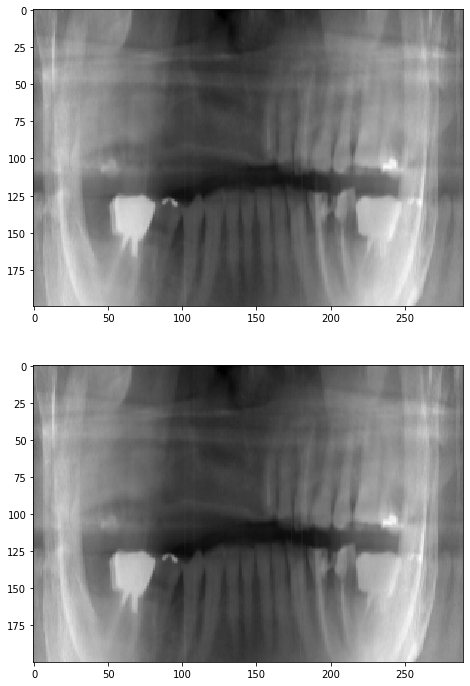

In [85]:
tot_a = np.transpose(tot_2, (1,0,2))

tot_b1 = np.zeros((200, 290))
tot_b2 = np.zeros((200, 290))

for s in range(tot_a.shape[0]):
    tot_b1 += tot_a[s, ...]
    tot_b2 += tot_a[s, ...]*(1-((1/(2*tot_a.shape[0])*s)))
    
plt.figure(figsize=(12,12))
plt.subplot(211)
plt.imshow(np.flipud(tot_b1), cmap='gray')

plt.subplot(212)
plt.imshow(np.flipud(tot_b2), cmap='gray')

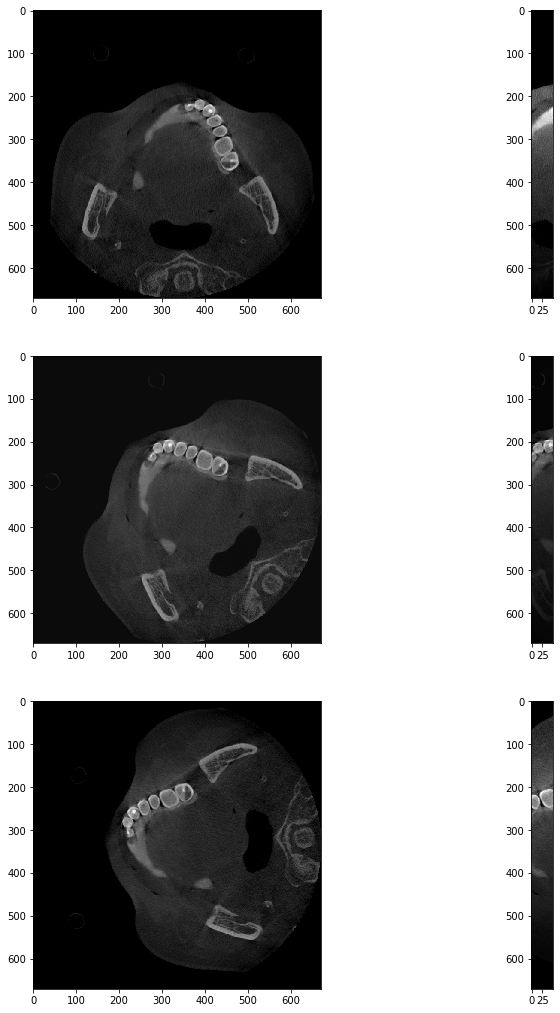

In [42]:
plt.figure(figsize=(12,18))
plt.subplot(321)
plt.imshow(np.rot90(tmp_[100, ...]), cmap='gray')
plt.subplot(322)
plt.imshow(tot2[0][100, ...], cmap='gray')

plt.subplot(323)
plt.imshow(rotate(tmp_[100, ...], 135, axes=(0,1), reshape=False), cmap='gray')
plt.subplot(324)
plt.imshow(tot2[1][100, ...], cmap='gray')

plt.subplot(325)
plt.imshow(np.rot90(tmp_[100, ...], k =2), cmap='gray')
plt.subplot(326)
plt.imshow(tot2[2][100, ...], cmap='gray')